# 1- Classification Numbers Using MNIST Dataset 

## Fetch MNIST Dataset

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# for train test split
from sklearn.model_selection import train_test_split

In [2]:
# read the data
test = pd.read_csv("mnist_test.csv")
train = pd.read_csv("mnist_train.csv")

# concatanete test and train data and make a whole dataset
data = pd.concat([test, train], axis=0)
data.head(7)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# see data shape
data.shape

(70000, 785)

## Binary Classification for '0' and '1' data Using NN 

In [4]:
# get label only 0 and 1 and concatanete
label_filter0 = 0
label_filter1 = 1

data = pd.concat([data[data["label"] == label_filter0],
                  data[data["label"] == label_filter1]], axis=0)
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# get label
y_data = data["label"]

# create train dataset
X_data = data.drop(["label"], axis=1)
print("X data:", X_data.shape)
print("Y_data:", y_data.shape)

X data: (14780, 784)
Y_data: (14780,)


In [6]:
# see picture size
pic_size = int(np.sqrt(X_data.shape[1]))
pic_size

28

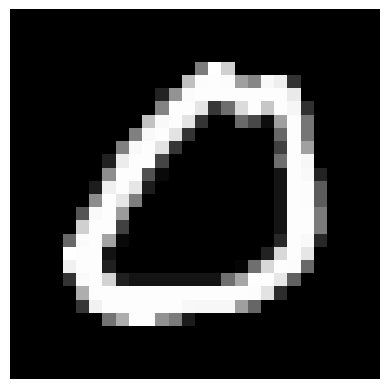

In [7]:
# visualize one of the picture of 0
pic1 = X_data.iloc[875].values
pic1 = pic1.reshape((pic_size, pic_size))
plt.imshow(pic1, cmap="gray")
plt.axis("off")
plt.show()

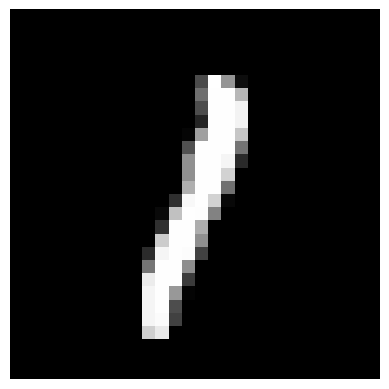

In [8]:
# visualize one of the picture of 1
pic2 = X_data.iloc[8000].values
pic2 = pic2.reshape((pic_size, pic_size))
plt.imshow(pic2, cmap="gray")
plt.axis("off")
plt.show()

In [9]:
# split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size=0.2,
                                                    random_state=42)
print("X train:", X_train.shape)
print("X test:", X_test.shape)
print("y train:", y_train.shape)
print("y test:", y_test.shape)

X train: (11824, 784)
X test: (2956, 784)
y train: (11824,)
y test: (2956,)


## Build a NN Model

In [10]:
# import deep learning libraries
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

# method for our model
def classifierMethod():
    classifier = Sequential()
    classifier.add(Dense(units=8, kernel_initializer="uniform",
                         activation="relu", input_dim=X_train.shape[1]))
    classifier.add(Dense(units=4, kernel_initializer="uniform",
                         activation="relu"))
    classifier.add(Dense(units=1, kernel_initializer="uniform",
                         activation="sigmoid"))
    classifier.compile(optimizer="adam", loss="binary_crossentropy",
                       metrics=["accuracy"])
    return classifier
siniflandirici = KerasClassifier(build_fn=classifierMethod, epochs=5)
dogruluk = cross_val_score(estimator=siniflandirici, X=X_train,
                           y=y_train, cv=3)
mean = dogruluk.mean()
std = dogruluk.std()
print("Accuracy mean:", str(mean))
print("Accuracy std", str(std))

Epoch 1/5
247/247 [==============================] - 2s 3ms/step - loss: 0.0393 - accuracy: 0.9942
Epoch 2/5
247/247 [==============================] - 1s 3ms/step - loss: 0.0040 - accuracy: 0.9986
Epoch 3/5
247/247 [==============================] - 1s 3ms/step - loss: 0.0045 - accuracy: 0.9989
Epoch 4/5
247/247 [==============================] - 1s 5ms/step - loss: 0.0016 - accuracy: 0.9994
Epoch 5/5
124/124 [==============================] - 1s 3ms/step - loss: 0.0058 - accuracy: 0.9987
Epoch 1/5
247/247 [==============================] - 2s 3ms/step - loss: 0.0397 - accuracy: 0.9944
Epoch 2/5
247/247 [==============================] - 1s 3ms/step - loss: 0.0051 - accuracy: 0.9985
Epoch 3/5
247/247 [==============================] - 1s 3ms/step - loss: 0.0025 - accuracy: 0.9991
Epoch 4/5
247/247 [==============================] - 1s 3ms/step - loss: 0.0030 - accuracy: 0.9986
Epoch 5/5
124/124 [==============================] - 1s 3ms/step - loss: 0.0022 - accuracy: 0.9995
Epoch 1/5


## Classification All Numbers Using CNN

In [11]:
# concolutional neural network
# read the data
test = pd.read_csv("mnist_test.csv")
train = pd.read_csv("mnist_train.csv")

# concatane test and train data and make a whole dataset
data = pd.concat([test, train], axis=0)
data.head(7)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# get label
y_data = data["label"]

# create train dataset
X_data = data.drop(["label"], axis=1)
print("X data:", X_data.shape)
print("Y_data:", y_data.shape)

X data: (70000, 784)
Y_data: (70000,)


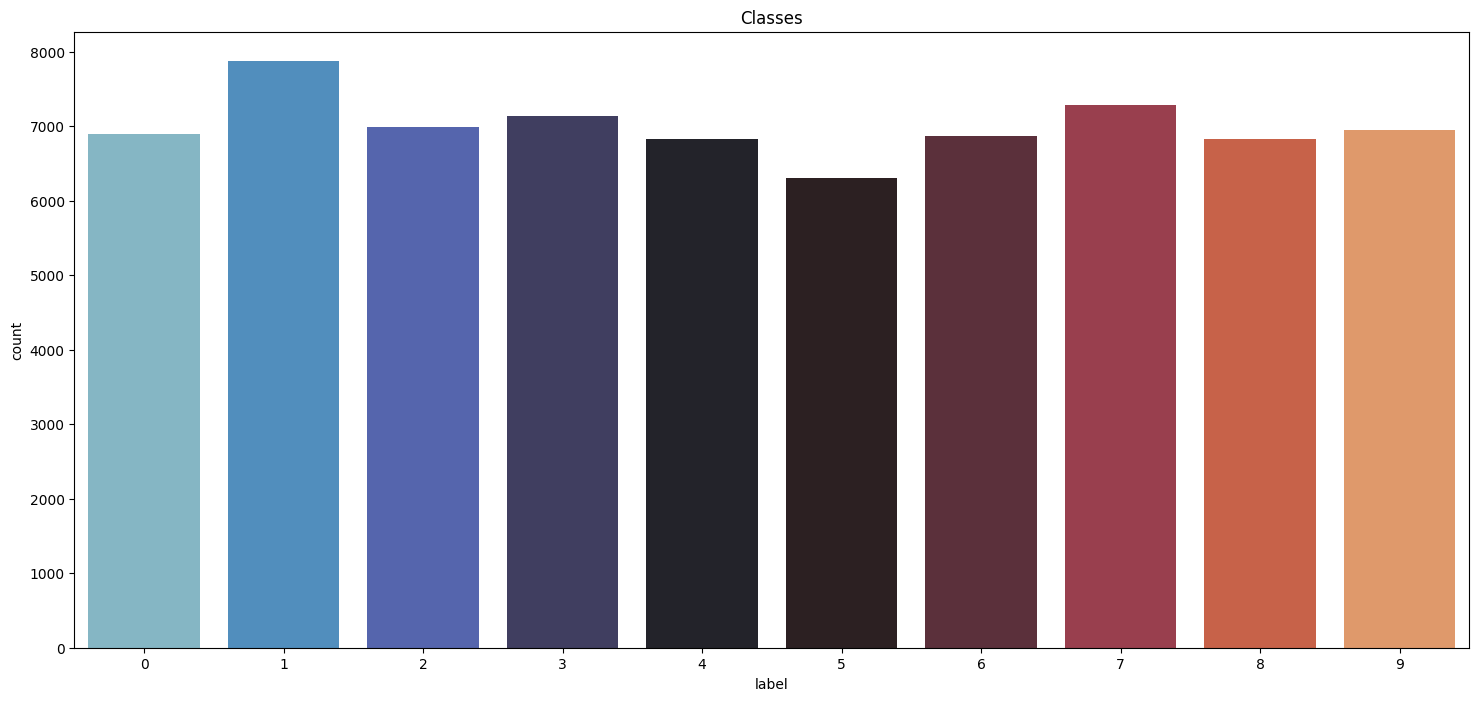

Classes and Number of Samples: 1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: label, dtype: int64


In [13]:
# visualize number of digits classes
plt.figure(figsize=(18,8))
g = sns.countplot(y_data, palette="icefire")
plt.title("Classes")
plt.show()
print("Classes and Number of Samples:", y_data.value_counts())

In [14]:
# see picture size
pic_size = int(np.sqrt(X_data.shape[1]))
pic_size

28

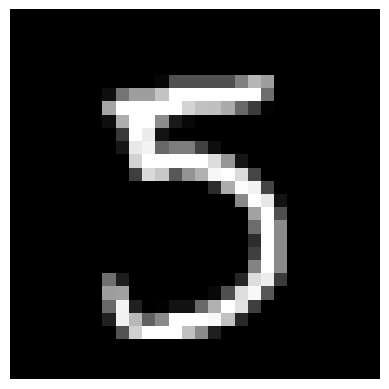

In [15]:
# visualize one of the picture of 5
pic3 = X_data.iloc[4263].values
pic3 = pic3.reshape((pic_size, pic_size))
plt.imshow(pic3, cmap="gray")
plt.axis("off")
plt.show()

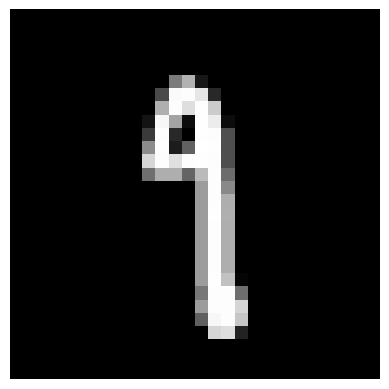

In [16]:
# visualize one of the picture of 9
pic4 = X_data.iloc[2387].values
pic4 = pic4.reshape((pic_size, pic_size))
plt.imshow(pic4, cmap="gray")
plt.axis("off")
plt.show()

In [17]:
# normalize the data
X_data = X_data / 255.0
# reshape
X_data = X_data.values.reshape(-1, 28, 28, 1)
print("x data shape:", X_data.shape)

x data shape: (70000, 28, 28, 1)


In [18]:
# label coding
from keras.utils.np_utils import to_categorical # for turn into a vector
y_data = to_categorical(y_data, num_classes=10)

In [19]:
# split the train data and validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size=0.15,
                                                    random_state=42)
print("X train dimension:", X_train.shape)
print("X test dimension:", X_test.shape)
print("y train dimension:", y_train.shape)
print("y test dimension:", y_test.shape)

X train dimension: (59500, 28, 28, 1)
X test dimension: (10500, 28, 28, 1)
y train dimension: (59500, 10)
y test dimension: (10500, 10)


## Build a CNN Model

In [20]:
# import libraries for convolutional neural network
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(5, 5), padding="Same",
                activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="Same",
                activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
# full connect
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [21]:
# for optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [22]:
model.compile(optimizer=optimizer, loss="categorical_crossentropy",
              metrics=["accuracy"])

In [23]:
epochs = 10
batch_size = 250

In [24]:
# data augmentation
datagen = ImageDataGenerator(featurewise_center=False,  # girdi ortalamasını veri kümesi üzerinden 0 olarak ayarlar
                             samplewise_center=False,  # her bir örnek ortalamasını 0 olarak ayarlar
                             featurewise_std_normalization=False,  # girdileri veri kümesinin standartlarına böl
                             samplewise_std_normalization=False,  # her girdiyi std'ye böl
                             zca_whitening=False,  # dimension reduction
                             rotation_range=5,  # rotation
                             zoom_range=0.1,  # % 10 görüntüyü rastgele yakınlaştırır
                             width_shift_range=0.1,  # görüntüleri yatay olarak rastgele kaydır %10
                             height_shift_range=0.1,  # görüntüleri dikey olarak rastgele kaydır %10
                             horizontal_flip=False,  # görüntüleri yatay olarak rastgele çevir
                             vertical_flip=False)  # görüntüleri dikey olarak rastgele çevir
datagen.fit(X_train)

## Train the CNN Model

In [25]:
# train the model
history = model.fit_generator(datagen.flow(X_train, y_train,
                                           batch_size=batch_size),
                                           epochs=epochs,
                                          validation_data=(X_test, y_test),
                                          steps_per_epoch=X_train.shape[0] // batch_size,
                                          verbose=2)

Epoch 1/10
238/238 - 54s - loss: 0.8777 - accuracy: 0.7113 - val_loss: 0.1414 - val_accuracy: 0.9578 - 54s/epoch - 227ms/step
Epoch 2/10
238/238 - 54s - loss: 0.3317 - accuracy: 0.8963 - val_loss: 0.0925 - val_accuracy: 0.9739 - 54s/epoch - 227ms/step
Epoch 3/10
238/238 - 52s - loss: 0.2522 - accuracy: 0.9211 - val_loss: 0.0715 - val_accuracy: 0.9795 - 52s/epoch - 218ms/step
Epoch 4/10
238/238 - 55s - loss: 0.2191 - accuracy: 0.9315 - val_loss: 0.0625 - val_accuracy: 0.9812 - 55s/epoch - 231ms/step
Epoch 5/10
238/238 - 51s - loss: 0.1898 - accuracy: 0.9419 - val_loss: 0.0514 - val_accuracy: 0.9844 - 51s/epoch - 215ms/step
Epoch 6/10
238/238 - 54s - loss: 0.1729 - accuracy: 0.9469 - val_loss: 0.0481 - val_accuracy: 0.9859 - 54s/epoch - 227ms/step
Epoch 7/10
238/238 - 52s - loss: 0.1614 - accuracy: 0.9497 - val_loss: 0.0453 - val_accuracy: 0.9869 - 52s/epoch - 217ms/step
Epoch 8/10
238/238 - 49s - loss: 0.1499 - accuracy: 0.9532 - val_loss: 0.0406 - val_accuracy: 0.9881 - 49s/epoch - 206

## Results

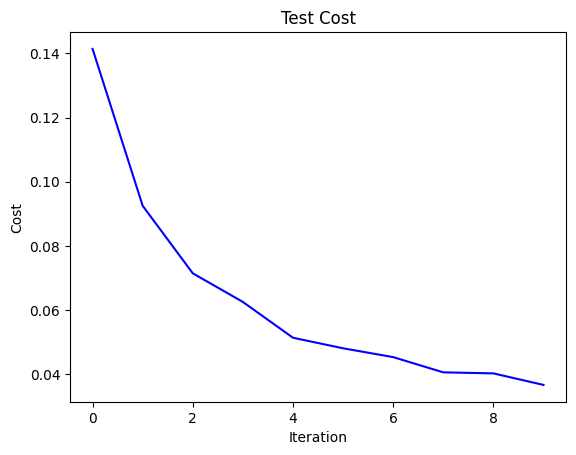

In [26]:
# cost visualization
plt.plot(history.history["val_loss"], color="b")
plt.title("Test Cost")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

329/329 [==============================] - 3s 8ms/step


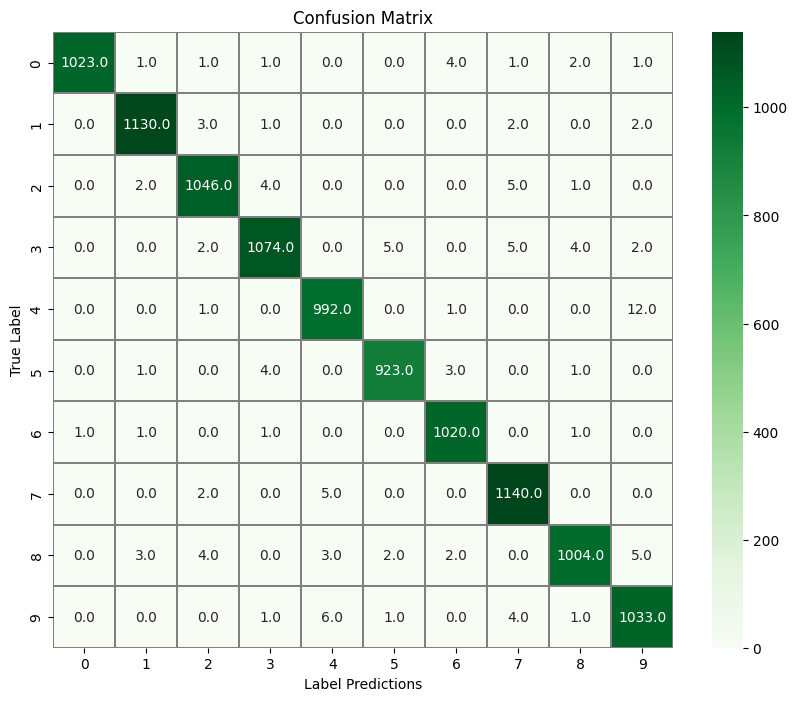

In [27]:
# predict
y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

y_true = np.argmax(y_test, axis=1)

confusion_mtx = confusion_matrix(y_true, y_pred_classes)

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,
            cmap="Greens", linecolor="gray", fmt=".1f", ax=ax)
plt.xlabel("Label Predictions")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Forecasting Numbers of Airline Passengers

## Fetch Passengers Data

In [28]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

In [29]:
# read the data
data = pd.read_csv("airline-passengers.csv")
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


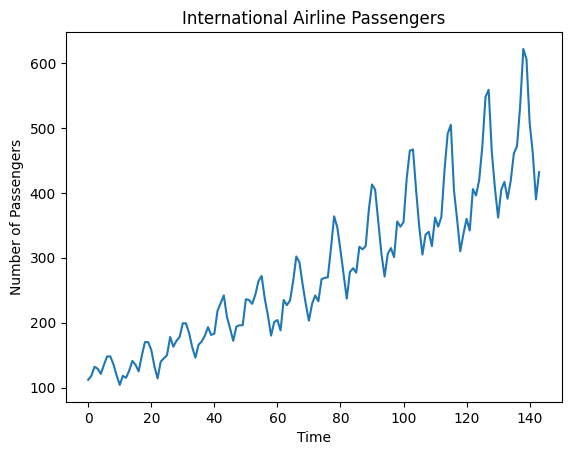

In [30]:
# visualize the data
data = data.iloc[:, 1].values
plt.plot(data)
plt.xlabel("Time")
plt.ylabel("Number of Passengers")
plt.title("International Airline Passengers")
plt.show()

## Preprocessing

In [31]:
# change the data shape and type
data = data.reshape(-1,1)
data = data.astype("float32")
data.shape

(144, 1)

In [32]:
# normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)
data_scaled[: 4]

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255]], dtype=float32)

In [33]:
# split the data train and test
train_len = int(len(data) * 0.60)
test_lem = len(data) - train_len

train = data_scaled[0: train_len, :]
test = data_scaled[train_len:len(data), :]
print("Train size: {}, Test size: {}".format(len(train), len(test)))

Train size: 86, Test size: 58


In [34]:
# shape the train data 
time_stemp = 10
dataX = []
dataY = []
for i in range(len(train) - time_stemp - 1):
    a = train[i : (i + time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
trainX = np.array(dataX)
trainY = np.array(dataY)

In [35]:
# shape the test data 
dataX = []
dataY = []
for i in range(len(test) - time_stemp - 1):
    a = test[i : (i + time_stemp), 0]
    dataX.append(a)
    dataY.append(test[i + time_stemp, 0])
testX = np.array(dataX)
testY = np.array(dataY)

In [36]:
# arrange the shape of test and train data and make suitable for keras
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
print("trainX shape:", trainX.shape)
print("testX shape", testX.shape)

trainX shape: (75, 10, 1)
testX shape (47, 10, 1)


## Build a RNN Model and Train the Model

In [37]:
# Create RNN model
# import keras libraries
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout

regressor = Sequential()
# input layer 
regressor.add(SimpleRNN(units = 120, activation="relu", return_sequences=True,
                       input_shape=(trainX.shape[1], 1)))
regressor.add(Dropout(0.2))
# layer 2
regressor.add(SimpleRNN(units = 80, activation="relu", return_sequences=True))
regressor.add(Dropout(0.2))
# layer 3
regressor.add(SimpleRNN(units = 40, activation="relu", return_sequences=True,
                       input_shape=(trainX.shape[1], 1)))
regressor.add(Dropout(0.2))
# layer 4
regressor.add(SimpleRNN(units = 20, activation="relu", return_sequences=True,
                       input_shape=(trainX.shape[1], 1)))
regressor.add(Dropout(0.2))
# layer 5
regressor.add(SimpleRNN(units = 10))
regressor.add(Dropout(0.2))
# output layer
regressor.add(Dense(units=1))

# compile model
regressor.compile(optimizer="adam", loss="mean_squared_error")

# train the model
regressor.fit(trainX, trainY, epochs=250, batch_size=50, verbose=0)

## Results

In [38]:
# evaluate model
import math
from sklearn.metrics import mean_squared_error

trainPredict = regressor.predict(trainX)
testPredict = regressor.predict(testX)

# reverse the normalized data
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

2/2 [==============================] - 0s 10ms/step


In [39]:
# mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[ : , 0]))
print("Train score: %.3f RMSE" % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[ : , 0]))
print("Test score: %.3f RMSE" % (testScore))

Train score: 16.590 RMSE
Test score: 56.113 RMSE


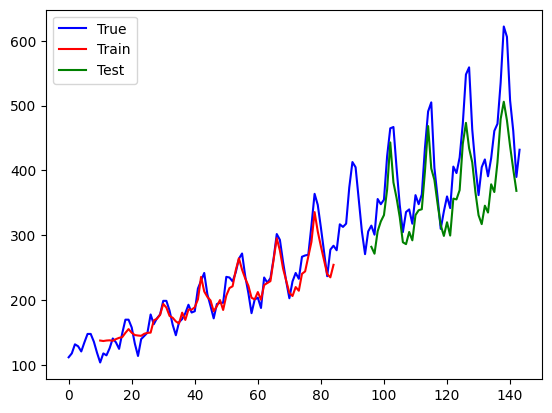

In [40]:
# scroll the train data
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_stemp: len(trainPredict) + time_stemp, :] = trainPredict

#  scroll the test data
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (time_stemp * 2) + 1 : len(data) - 1, :] = testPredict

# visualize
plt.plot(scaler.inverse_transform(data_scaled), color="b", label="True")
plt.plot(trainPredictPlot, color="r", label="Train")
plt.plot(testPredictPlot, color="g", label="Test")
plt.legend()
plt.show()